## Begin construction of 35N AMOC time series

This code begins construction, stitches datasets together and saves the full section output. Next steps will include addition of Ekman and throughflow/closure.

In [1]:
%matplotlib inline
import xarray as xr

In [2]:
from xgcm import Grid
from pylab import *
import seawater as sw
import gsw
import scipy.signal as sig
from xhistogram.xarray import histogram

In [3]:
from dask.distributed import Client,progress
from dask_gateway import Gateway

In [4]:
client = Client(n_workers=30,threads_per_worker=20,memory_limit='180GB')

/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46742 instead
  warnings.warn(


In [5]:
basedir='/vortexfs1/home/ilebras/'
datadir=basedir+'data/'

In [6]:
xray=xr.open_dataset(datadir+'Willis/ilebras/Willis_allvars_Aug2022.nc',chunks={})

Calculate meridional geostrophic velocity

In [7]:
rho0=1030

In [8]:
xray=xray.rename({'den':'dmap'})

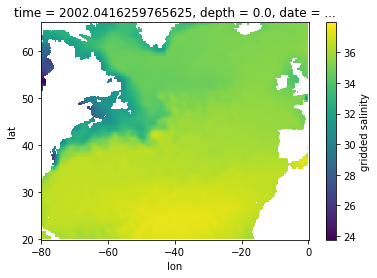

In [9]:
xray.sal.isel(depth=0).isel(date=0).plot()

In [10]:
def get_geovel(xray):
    xray=xray.assign_coords(loni=xray.lon.values[:-1]+diff(xray.lon.values)/2)
    lonmat,latmat=meshgrid(xray.lon,xray.lat)
    xray['distdiff']=(['lat','loni'],gsw.distance(lonmat,latmat))
    xray['fcor']=(['lat'],sw.f(xray.lat))
    #shear
    xray['drho_base']=(['depth','lat','loni','date'],xray['dmap'].where(xray.depth<-xray.bathy).diff(dim='lon'))
    shear=xray['drho_base']*9.8/xray.fcor/rho0/xray.distdiff
    print(shear)
    xray['depthdiff']=(['depth'],hstack((5,xray.depth.diff(dim='depth'))))
    geovel=(shear*xray.depthdiff).cumsum(dim='depth')
    # reference velocity
    xray['velref']=(['lat','loni','date'],(xray.vmap+xray.vmap.diff(dim='lon')/2))
    xray['vg']=(['depth','lat','loni','date'],geovel+(xray.velref-geovel.sel(depth=1000)))
    xray['area']=xray['depthdiff']*xray['distdiff']
    xray['trans']=(xray['vg']*xray['area'])/1e6
    return xray

xray=get_geovel(xray)

<xarray.DataArray (depth: 201, lat: 185, loni: 320, date: 240)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [ 5.03754608e-0

distributed.nanny - WARNING - Restarting worker
distributed.nanny - ERROR - Nanny failed to start process
Traceback (most recent call last):
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/nanny.py", line 575, in start
    await self.process.start()
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/process.py", line 33, in _call_and_set_future
    res = func(*args, **kwargs)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/process.py", line 203, in _start
    process.start()
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/context.py", line 284, in _Popen
    return Popen(process_obj)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/popen_spawn_posix.py

distributed.nanny - ERROR - Nanny failed to start process
Traceback (most recent call last):
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/nanny.py", line 575, in start
    await self.process.start()
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/process.py", line 33, in _call_and_set_future
    res = func(*args, **kwargs)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/process.py", line 203, in _start
    process.start()
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/context.py", line 284, in _Popen
    return Popen(process_obj)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/popen_spawn_posix.py", line 32, in __init__
    super().__init__(pro

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker
distributed.nanny - ERROR - Nanny failed to start process
Traceback (most recent call last):
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/nanny.py", line 575, in start
    await self.process.start()
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/process.py", line 33, in _call_and_set_future
    res = func(*args, **kwargs)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/process.py", line 203, in _start
    process.start()
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/context.py", line 284, in _Popen
    return Popen(process_obj)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/li

distributed.nanny - WARNING - Restarting worker
distributed.nanny - ERROR - Nanny failed to start process
Traceback (most recent call last):
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/nanny.py", line 575, in start
    await self.process.start()
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/process.py", line 33, in _call_and_set_future
    res = func(*args, **kwargs)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/site-packages/distributed/process.py", line 203, in _start
    process.start()
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/process.py", line 121, in start
    self._popen = self._Popen(self)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/context.py", line 284, in _Popen
    return Popen(process_obj)
  File "/vortexfs1/home/ilebras/.conda/envs/OneEnv/lib/python3.8/multiprocessing/popen_spawn_posix.py

MemoryError: Unable to allocate 21.3 GiB for an array with shape (201, 185, 320, 240) and data type float64

cut out the med - go back to limiting time period as a test!

In [ ]:
start_date='2004-5-1'
end_date='2014-5-1'

In [ ]:
xray=xray.sel(loni=slice(-80,-6)).sel(lon=slice(-80,-6)).sel(date=slice(start_date,end_date))

In [ ]:
xray

In [ ]:
theta=pi*60/180

LWsel = Willis properties extracted along LW line

In [ ]:
LW=xr.open_dataset(datadir+'LineW/LineW_moorings_dailygridded_April2021.nc')

Start extraction from Line W origin

In [ ]:
#line along the Line W path:
m=(LW.lat[4]-LW.lat[0])/(LW.lon[4]-LW.lon[0])
c=LW.lat[0]-m*LW.lon[0]
LWsel=xr.Dataset()
LWsel=LWsel.assign_coords({'xind':range(73),'xind_i':range(74),'date':xray.date,'depth':xray.depth})
lonstp=0.1
LWsel['loni']= (['xind'],(arange(LW.lon_origin,-63,lonstp)))
LWsel['lati']=(['xind'],(float(m)*LWsel.loni+float(c)))
latstp=mean(diff(LWsel['lati']))
LWsel['lon']= (['xind_i'],hstack((LWsel.loni[0]-lonstp/2,LWsel.loni[:-1]+lonstp/2,LWsel.loni[-1]+lonstp/2)))
LWsel['lat']=(['xind_i'],hstack((LWsel.lati[0]-latstp/2,LWsel.lati[:-1]+latstp/2,LWsel.lati[-1]+latstp/2)))

Get geovel across Line W section

Note: Counterintuitively, xind and xind_i correspond to loni and lon, respectively (because of coding laziness)

In [ ]:
LWsel['sigma2_i']=(['depth','xind','date'],xray['sigma2'].interp(lon=LWsel.loni,lat=LWsel.lati))
LWsel['bathy_i']=(['xind'],xray['bathy'].interp(lon=LWsel.loni,lat=LWsel.lati))
LWsel['rho_i']=(['depth','xind','date'],(xray['dmap']+1e3).interp(lon=LWsel.loni,lat=LWsel.lati))

In [ ]:
LWsel['dmap']=(['depth','xind_i','date'],xray['dmap'].interp(lon=LWsel.lon,lat=LWsel.lat))#.where(xray.mask==1)
# LWsel['maski']=(['depth','xind'],xray['maski'].interp(loni=LWsel.loni,lat=LWsel.lati))
LWsel['distdiff']=(['xind'],gsw.distance(LWsel.lon.values,LWsel.lat.values))
LWsel['drho_base']=(['depth','xind','date'],LWsel['dmap'].diff(dim='xind_i'))
LWsel['fcor']=(['xind'],sw.f(LWsel.lati))
shear=LWsel['drho_base']*9.8/LWsel.fcor/rho0/LWsel.distdiff
geovel=(shear*xray.depthdiff).cumsum(dim='depth')
# reference velocity
uref=xray.umap.interp(lon=LWsel.loni,lat=LWsel.lati)#.where(xray.mask==1)
vref=xray.vmap.interp(lon=LWsel.loni,lat=LWsel.lati)#.where(xray.mask==1)

In [ ]:
vtot_ref=uref*sin(theta)+vref*cos(theta)
LWsel['velref']=(['xind','date'],vtot_ref)
LWsel['vg']=(['depth','xind','date'],(geovel+LWsel.velref-geovel.sel(depth=1000)).where(LWsel.depth<-LWsel.bathy_i))#.where(LWsel.maski==1))
LWsel['area']=xray['depthdiff']*LWsel['distdiff']
LWsel['trans']=(LWsel['vg']*LWsel['area'])/1e6

In [ ]:
#quick addition necessary for stitching together
xray['sigma2_i']=xray['sigma2'].interp(lon=xray.loni)
xray['bathy_i']=xray['bathy'].interp(lon=xray.loni)
xray['rho_i']=(xray['dmap']+1e3).interp(lon=xray.loni)

LWSEC = just the portion I need to stich to zonal section

In [ ]:
#choosing lat=35, as its least noisy - away from eddy field
latsel=35

In [ ]:
#get longitude intersection for a given cut-across latitude
def get_lonx(latch):
    lonx_var=LW.lon[0]+(LW.lon[4]-LW.lon[0])*(latch-LW.lat[0])/(LW.lat[4]-LW.lat[0])
    return lonx_var

In [ ]:
(arctan(abs(LW.lat[4]-LW.lat[0])/abs(LW.lon[4]-LW.lon[0]))+pi/2)*180/pi

In [ ]:
lonsel=get_lonx(latsel)

In [ ]:
# a lot of re-jiggering to match xray nomenclature
LWSEC=LWsel.set_coords('loni').set_coords('lati').swap_dims({'xind':'lati'}).sel(lati=slice(41,latsel)).drop('xind').swap_dims({'lati':'loni'})

In [ ]:
LWSEC.vg.mean(dim='date').plot()

LWplus = LW extraction stitched to zonal section (Still all Willis product)

In [ ]:
LWplus=xr.Dataset()
for var in ['vg','sigma2_i','loni','bathy_i','rho_i']:
    LWplus[var]=xr.concat([LWSEC.drop('lati')[var],xray.sel(lat=latsel)[var].sel(loni=slice(lonsel,-6))],dim='loni',coords='minimal')
# LWplus['bathy_i']=LWplus['bathy_i'].isel(depth=0)
LWplus['depthdiff']=xray['depthdiff']

In [ ]:
LWplus['lat']=(['loni'],hstack((LWSEC['lati'],latsel*ones(len(LWplus.loni)-len(LWSEC.lati)))))

In [ ]:
plot(LWplus.loni,LWplus.lat,'.')
xlim(-70,-62)

In [ ]:
# join the distdiff correctly at the juncture:
xrdist1=LWSEC['distdiff']
xrdist2=xray['distdiff'].sel(lat=latsel).sel(loni=slice(lonsel,0))
joint_dist=gsw.distance([xrdist1.loni[-1],lonsel,xrdist2.loni[0]],[xrdist1.lati[-1],latsel,latsel])
xrdist1_corr=xrdist1.copy()
xrdist1_corr[-1]=xrdist1[-1]/2+joint_dist[0]
xrdist2_corr=xrdist2.copy()
xrdist2_corr[0]=xrdist2[0]/2+joint_dist[1]
LWplus['distdiff']=xr.concat([xrdist1_corr.drop('lati'),xrdist2_corr],dim='loni')
distdiff_i=(LWplus.distdiff[0:]+LWplus.distdiff[:-1])/2
LWplus['dist']=('loni',hstack((0,cumsum(distdiff_i)/1e3)))
LWplus=LWplus.swap_dims({'loni':'dist'})
LWplus['trans']=LWplus['vg']*LWplus['depthdiff']*LWplus['distdiff']/1e6

Combine Willis and LW data

but first... smooth the Line W data

In [ ]:
def smoothfunc(tseries):
   # Design the Buterworth filter
    ## 2nd order 3 month default filter
    N  = 2    # Filter order
    Wn = 1/(365.25/4) # Cutoff frequency (3 months)
    B, A = sig.butter(N, Wn, output='ba')
    tseries_sm=sig.filtfilt(B,A,tseries)
    return tseries_sm

LW_sm=xr.Dataset()
# focus on w1-w5 and remove any times with no data
#note: max depth needs to be deep enough for the full basin
LW_10m=LW.interp(depth=arange(0,5600,10)).isel(dist=slice(0,5)).dropna(dim='date',how='all')
LW_vg_sm=xr.apply_ufunc(smoothfunc,LW_10m.vg)
LW_sig2_sm=xr.apply_ufunc(smoothfunc,LW_10m.sigma2)
LW_rho_sm=xr.apply_ufunc(smoothfunc,LW_10m.rho)
LW_sm['vg']=LW_vg_sm.interp(date=LWplus.date)
LW_sm['sigma2_i']=LW_sig2_sm.interp(date=LWplus.date)
LW_sm['rho_i']=LW_rho_sm.interp(date=LWplus.date)
LW_sm['depthdiff']=(['depth'],hstack((LW_sm.vg.depth[1]/2,LW_sm.vg.depth.diff(dim='depth'))))
LW_sm['distdiff']=(['dist'],LW['distdiff'].isel(dist=slice(0,5)))

In [ ]:
figure(figsize=(6,3))
# [axvspan(datetime.datetime(xx,1,1),datetime.datetime(xx,3,1),color='grey',alpha=0.6) for xx in range(2004,2015)];
LWmoor_trans=(LW.vg*LW.distdiff*LW.depthdiff/1e6).sel(depth=slice(500,2000)).sum(dim='dist').sum(dim='depth')
LWmoor_trans.plot(alpha=0.3)
plot(LW.date,smoothfunc(LWmoor_trans),color='C0',label='Line W')
# (LW_sm.vg*LW_sm.distdiff*LW_sm.depthdiff/1e6).sel(depth=slice(500,2000)).sum(dim='dist').sum(dim='depth').plot(label='Line W + SSH (smooth first)',linestyle='--')
Willis_LWtrans=LWplus.trans.swap_dims({'dist':'loni'}).sel(loni=slice(-71,-68.45)).sum(dim='loni').sel(depth=slice(500,2000)).sum(dim='depth')
Willis_LWtrans.plot(label='Float + Altimeter')
ylabel('Transport [Sv]')
legend(loc=2)
title('Transport across the Line W section 500m-2000m')
xlim(LW.date[0].values,LW.date[-1].values)
ylim(-35,35)
xlabel('')
xticks(rotation=0,ha='center')
# savefig(figdir+'LineW_WillisComp.pdf',bbox_inches='tight')
# savefig(figdir+'LineW_WillisComp.png',bbox_inches='tight',dpi=300)

In [ ]:
LWmoor_trans.to_netcdf(datadir+'NASA_AMOC/LWtrans_moor.nc','w',format='netCDF4')
Willis_LWtrans.to_netcdf(datadir+'NASA_AMOC/LWtrans_Willis.nc','w',format='netCDF4')

In [ ]:
LW.dist[-2]*1e3+LW.distdiff[-2]

Interpolate LW mooring data to Willis product specs

In [ ]:
# no longer needed as now using LW origin as section starting point
distcorr=gsw.distance([LW.lon_origin,LWplus.loni[0]],[LW.lat_origin,LWplus.lat[0]])[0]/1e3

In [ ]:
LW_simple=LW_sm.drop('moor').rename({'lon':'loni'})
LW_simple['dist']=(['dist'],LW_sm['dist'].values+distcorr)
LW_simple=LW_simple.interpolate_na(dim='depth',fill_value='extrapolate',method='nearest')

In [ ]:
LW_simple.vg.mean(dim='date').plot()

In [ ]:
LWinterp=LW_simple.interp(dist=LWplus.dist)
for var in ['vg','sigma2_i','rho_i']:
    LWinterp[var]=LWinterp[var].where(LWinterp.depth<-1*LWplus.bathy_i)

Now, stitch Line W moorings into Argo/sat product

In [ ]:
d0=LW_simple.dist[0]
dE=LW_simple.dist[-1]

In [ ]:
#LW weighted towards bottom/2000m, Willis towards surface
bathy_maxed=-1000
sfc_weight=((LWinterp.depth+bathy_maxed)/bathy_maxed+1).where(LWinterp.depth>1000,1).where(LWinterp.depth<2000,0)#.where(LWinterp.depth<-LWplus.bathy_i)
bot_weight=1-sfc_weight
LWstitch=xr.Dataset()
for var in ['vg','sigma2_i']:
    lin_merged=LWplus[var].sel(dist=slice(d0,dE)).interp(depth=LWinterp.depth)*sfc_weight+LWinterp[var].sel(dist=slice(d0,dE))*bot_weight
    ss=2000
    LWstitch[var]=xr.concat([lin_merged.sel(depth=slice(0,ss-1)),
                               LWinterp[var].sel(dist=slice(d0,dE)).sel(depth=slice(ss,LWinterp.depth.max()))],
                               dim='depth',coords='minimal',compat='override')

In [ ]:
var='vg'

In [ ]:
LWmerge=xr.Dataset()
for var in ['vg','loni','lat']:
    LWmerge[var]=xr.concat([LWplus[var].sel(dist=slice(0,LW_simple.dist[0])),LWstitch[var],LWplus[var].sel(dist=slice(LW_simple.dist[-1],LWplus.dist[-1]))],dim='dist',coords='minimal')
   #.sel(dist=slice(LW_simple.dist[0],LW_simple.dist[-1])) 

In [ ]:
# no longer looking at times pre and post Line W
# quick cheat: fill sigma2 before and after Line W period so they can be used for LWplus transformation 
var='sigma2_i'
LWtime=xr.concat([LWplus[var].sel(dist=slice(0,LW_simple.dist[0])),LWstitch[var],LWplus[var].sel(dist=slice(LW_simple.dist[-1],LWplus.dist[-1]))],dim='dist',coords='minimal')
LWmerge[var]=xr.concat([LWplus.sigma2_i.sel(date=slice(LWplus.date[0],LW.date[0])),LWtime.sel(date=slice(LW.date[0],LW.date[-1])),LWplus.sigma2_i.sel(date=slice(LW.date[-1],LWplus.date[-1]))],dim='date')

In [ ]:
for var in ['bathy_i','depthdiff','distdiff']:
    LWmerge[var]=LWplus[var].copy()

In [ ]:
LWmerge['depthdiff']=LWmerge['depthdiff'].where(~isnan(LWmerge.depthdiff),10)

In [ ]:
LWmerge['trans']=LWmerge['vg']*LWmerge['distdiff']*LWmerge['depthdiff']/1e6

In [ ]:
plot(LWplus.loni,LWplus.lat,'.')
axvline(-65)
xlim(-70,-65)

In [ ]:
plot(LWmerge.loni,LWmerge.distdiff,'.')
xlim(-70,-65)

In [ ]:
LWmerge=LWmerge.where(LWmerge.depth<(-1*LWmerge.bathy_i))

In [ ]:
LWmerge['bathy_i']=LWmerge['bathy_i'].sel(depth=0)

In [ ]:
LWmerge.to_netcdf(datadir+'NASA_AMOC/Section35N_Step1.nc','w',format='netCDF4')

In [ ]:
LWplus.to_netcdf(datadir+'NASA_AMOC/Section35N_Step1_noLW.nc','w',format='netCDF4')

distributed.comm.tcp - WARNING - Closing dangling stream in <TCP  local=tcp://127.0.0.1:40727 remote=tcp://127.0.0.1:33114>
